In [1]:
import matplotlib.pyplot as plt
import csv
import pywt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

import os

In [2]:
classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes
count_classes

[0, 0, 0, 0, 0]

In [3]:
path = 'heart'
filenames = next(os.walk(path))[2]
records=list()
annotations=list()
filenames.sort()

StopIteration: 

In [ ]:
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    if(file_extension=='.csv'):
        records.append(path+'/'+filename+file_extension)
    else:
        annotations.append(path+'/'+filename+file_extension)

records[0]

'heart/100.csv'

In [ ]:
records[1]

'heart/101.csv'

In [ ]:
temp_signal=[]
with open(records[6],'r') as csvfile:
    filereader = csv.reader(csvfile,delimiter=',',quotechar='|')
    row_index = -1
    for row in filereader:
        if(row_index >= 0):
            temp_signal.insert(row_index, int(row[1]))
        row_index += 1

In [ ]:
temp_signal[:10]

[962, 962, 962, 962, 962, 962, 962, 962, 966, 967]

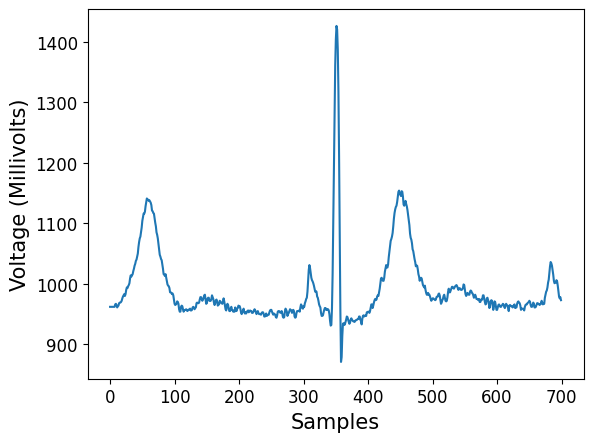

In [ ]:
plt.plot(temp_signal[:700])
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Voltage (Millivolts)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('before_preprocessing')

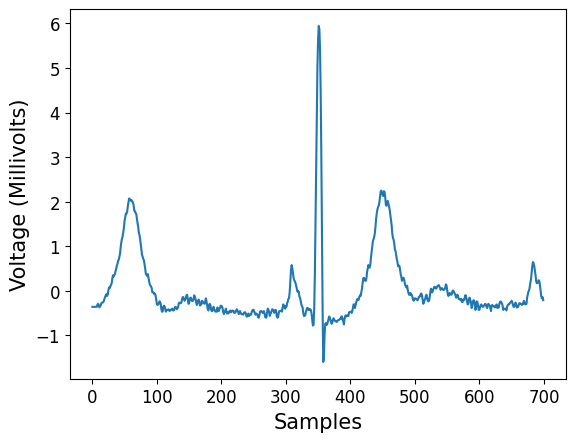

In [ ]:
temp_signal = stats.zscore(temp_signal)
plt.plot(temp_signal[:700])
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Voltage (Millivolts)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('after_norm')

In [ ]:
X=list()
y=list()
window_size=180
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

        
    signals = denoise(signals)
    #signals = signals.reshape(-1,1)
    signals = stats.zscore(signals)
    with open(annotations[r], 'r') as fileID:
            data = fileID.readlines() 
            beat = list()

            for d in range(1, len(data)): 
                splitted = data[d].split(' ') 
                splitted = filter(None, splitted)
                next(splitted) 
                pos = int(next(splitted)) 
                arrhythmia_type = next(splitted) 
                
                if(arrhythmia_type in classes):
                    arrhythmia_index = classes.index(arrhythmia_type)
                    count_classes[arrhythmia_index] += 1
                    if(window_size <= pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size:pos+window_size]   

                        X.append(beat)
                        y.append(arrhythmia_index)

    # data shape
    print(np.shape(X), np.shape(y))

(2271, 360) (2271,)
(4133, 360) (4133,)
(4236, 360) (4236,)
(6319, 360) (6319,)
(6484, 360) (6484,)
(9051, 360) (9051,)
(11078, 360) (11078,)
(11137, 360) (11137,)
(12896, 360) (12896,)
(15424, 360) (15424,)
(17548, 360) (17548,)
(20085, 360) (20085,)
(21872, 360) (21872,)
(23745, 360) (23745,)
(25696, 360) (25696,)
(28107, 360) (28107,)
(29641, 360) (29641,)
(31918, 360) (31918,)
(33905, 360) (33905,)
(35766, 360) (35766,)
(38240, 360) (38240,)
(39757, 360) (39757,)
(41336, 360) (41336,)
(43934, 360) (43934,)
(45786, 360) (45786,)
(47901, 360) (47901,)
(50873, 360) (50873,)
(53517, 360) (53517,)
(55271, 360) (55271,)
(57848, 360) (57848,)
(60852, 360) (60852,)
(63467, 360) (63467,)
(66214, 360) (66214,)
(69098, 360) (69098,)
(71355, 360) (71355,)
(74715, 360) (74715,)
(75121, 360) (75121,)
(77274, 360) (77274,)
(79320, 360) (79320,)
(81747, 360) (81747,)
(84015, 360) (84015,)
(86588, 360) (86588,)
(88640, 360) (88640,)
(90895, 360) (90895,)
(92465, 360) (92465,)
(94244, 360) (94244,)


In [ ]:
count_classes

[75052, 8075, 7259, 2546, 7130]

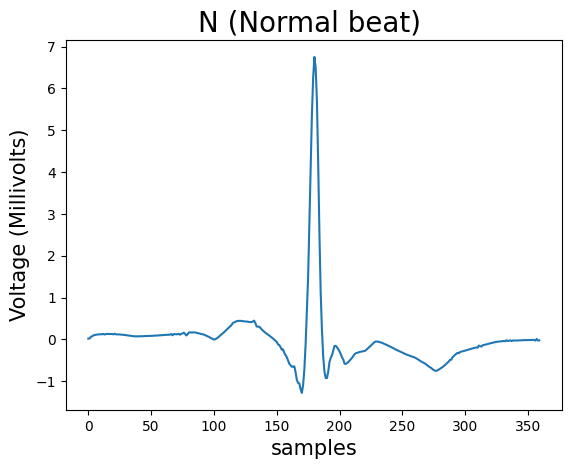

In [ ]:
i=0;
while y[i]!=0:
    i=i+1

plt.plot(X[i])
plt.title('N (Normal beat) ', fontsize=20)
plt.xlabel('samples',fontsize=15);
plt.ylabel('Voltage (Millivolts)',fontsize=15)
plt.savefig('N')

In [ ]:
y_df = pd.DataFrame(y)
y_df.head()
per_class = y_df[y_df.shape[1]-1].value_counts()
print(per_class)

0
0    75011
1     8071
2     7255
4     7129
3     2546
Name: count, dtype: int64


In [ ]:
X = np.array(X)
X_reshaped = X.reshape(-1,360,)
X_reshaped.shape

(100012, 360)

In [ ]:
X_df = pd.DataFrame(X_reshaped)
X_new_df = pd.concat([X_df,y_df],axis=1)
X_new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,0
0,0.018228,0.022953,0.058424,0.077107,0.095080,0.105492,0.112325,0.116982,0.119703,0.122254,...,-0.013640,-0.013518,-0.012969,-0.010249,-0.013186,-0.027581,0.010994,-0.026885,-0.020095,0
1,-0.366827,-0.344524,-0.320039,-0.330324,-0.299629,-0.292238,-0.283900,-0.275759,-0.267345,-0.257942,...,-0.140611,-0.140669,-0.140735,-0.141352,-0.140082,-0.136719,-0.144822,-0.139946,-0.142478,0
2,-0.171359,-0.140344,-0.109854,-0.078079,-0.048978,-0.034990,-0.028194,-0.024550,-0.024222,-0.023859,...,0.001325,0.007875,0.015828,0.025088,0.030657,0.026670,0.056487,0.028112,0.028259,0
3,-0.186526,-0.182575,-0.177326,-0.171800,-0.165320,-0.158725,-0.151677,-0.144942,-0.140875,-0.138009,...,0.021386,0.032036,0.043188,0.058269,0.074966,0.076706,0.073569,0.093104,0.116388,0
4,-0.369240,-0.368380,-0.344557,-0.314211,-0.295571,-0.279271,-0.261415,-0.243202,-0.221928,-0.200658,...,-0.019342,-0.014265,-0.009238,-0.004046,0.001153,0.006449,0.011785,0.016524,0.021073,0


In [ ]:
ax=list(range(361))
X_new_df = X_new_df.set_axis(ax, axis='columns')

In [ ]:
df_0=(X_new_df[X_new_df[X_new_df.shape[1]-1]==0]).sample(n=20000,random_state=42)
df_1=X_new_df[X_new_df[X_new_df.shape[1]-1]==1]
df_2=X_new_df[X_new_df[X_new_df.shape[1]-1]==2]
df_3=X_new_df[X_new_df[X_new_df.shape[1]-1]==3]
df_4=X_new_df[X_new_df[X_new_df.shape[1]-1]==4]

df_1_upsample=resample(df_1,replace=True,n_samples=7000,random_state=125)
df_2_upsample=resample(df_2,replace=True,n_samples=7000,random_state=77)
df_3_upsample=resample(df_3,replace=True,n_samples=7000,random_state=103)
df_4_upsample=resample(df_4,replace=True,n_samples=7000,random_state=59)

X_new_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
per_class = X_new_df[X_new_df.shape[1]-1].value_counts()
print(per_class)

360
0    20000
1     7000
2     7000
3     7000
4     7000
Name: count, dtype: int64


In [ ]:
train, test = train_test_split(X_new_df, test_size=0.20, random_state=7)
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(target_train.values.reshape(-1, 1))

# Transform the target_test
y_test = encoder.transform(target_test.values.reshape(-1, 1))

print(np.shape(y_train), np.shape(y_test))

(38400, 5) (9600, 5)


In [ ]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(X_train), np.shape(X_test))

(38400, 360, 1) (9600, 360, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten

In [ ]:

model = Sequential()

model.add(Conv1D(filters=16, kernel_size=11, strides=1, padding='same' , activation = 'relu', input_shape=(360,1)))
model.add(MaxPooling1D(pool_size=5, strides=2))
model.add(Conv1D(filters=32, kernel_size=13, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))
model.add(Conv1D(filters=64, kernel_size=15, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))
model.add(Conv1D(filters=128, kernel_size=17, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

e:\Hackaton\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 360, 16)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 178, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 178, 32)        │         6,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 87, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 87, 64)         │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 42, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 42, 128)        │       139,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       243,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,661 (1.62 MB)

 Trainable params: 425,661 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, batch_size=36, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8484 - loss: 0.4421 - val_accuracy: 0.9727 - val_loss: 0.0915
Epoch 2/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9713 - loss: 0.0942 - val_accuracy: 0.9817 - val_loss: 0.0641
Epoch 3/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9773 - loss: 0.0722 - val_accuracy: 0.9822 - val_loss: 0.0582
Epoch 4/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.9857 - val_loss: 0.0460
Epoch 5/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9849 - loss: 0.0473 - val_accuracy: 0.9842 - val_loss: 0.0475
Epoch 6/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9856 - val_loss: 0.0428
Epoch 7/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9911 - val_loss: 0.0312
Epoch 8/10
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9879 -

In [ ]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

cf = classification_report(y_true, prediction, target_names=classes,digits=4)
print(cf)

              precision    recall  f1-score   support

           N     0.9909    0.9864    0.9886      3967
           L     0.9827    0.9956    0.9891      1372
           R     0.9979    0.9973    0.9976      1461
           A     0.9647    0.9766    0.9706      1370
           V     0.9950    0.9839    0.9895      1430

    accuracy                         0.9876      9600
   macro avg     0.9863    0.9880    0.9871      9600
weighted avg     0.9877    0.9876    0.9876      9600



In [ ]:
model.save("ECG_final_model.h5")

In [ ]:
confusion_matrix(y_true, prediction)

array([[3913,    5,    0,   45,    4],
       [   5, 1366,    0,    0,    1],
       [   1,    0, 1457,    3,    0],
       [  27,    0,    3, 1338,    2],
       [   3,   19,    0,    1, 1407]])